In [1]:
!pip install tensorflow keras scikit-learn tqdm mediapy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 873.6 kB/s eta 0:00:00MB/s eta 0:00:01



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#Loading dataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import load_img

import os
import pandas
import numpy as np

train_path = '/home/student/BI66/Pneumonia X Ray-20231023T104042Z-002/Pneumonia X Ray'

images = []
labels = []

folder_names = ['NORMAL', 'PNEUMONIA']

label_value = 0

for folder_name in folder_names:
    for image in os.listdir(train_path+'/'+folder_name):
        img = load_img(train_path+f'/{folder_name}/'+image)
        img = img.resize((100, 100))
        img = img_to_array(img)
        images.append(img)

        labels.append(label_value)
        
    label_value = label_value + 1
    
images = np.array(images)
labels = np.array(labels)

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (/home/student/.local/lib/python3.10/site-packages/keras/preprocessing/image.py)

In [6]:
#Loading dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

import os
import pandas
import numpy as np

train_path = '/home/student/Downloads/Pneumonia X Ray-20231023T104042Z-002/Pneumonia X Ray/train'

images = []
labels = []

folder_names = ['NORMAL', 'PNEUMONIA']

label_value = 0

for folder_name in folder_names:
    for image in os.listdir(train_path+'/'+folder_name):
        img = load_img(train_path+f'/{folder_name}/'+image)
        img = img.resize((100, 100))
        img = img_to_array(img)
        images.append(img)

        labels.append(label_value)
        
    label_value = label_value + 1
    
images = np.array(images)
labels = np.array(labels)


Class 1


""

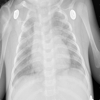

In [7]:
import random, mediapy, PIL

#Show preprocessed dataset
r = random.randint(0,len(images))

print('Class ' + str(labels[r]))
mediapy.show_image(array_to_img(images[r]))

In [8]:
#Train test split for testing
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.2)

#Train test split for validation
X_Train, xvalidation, Y_Train, yvalidation = train_test_split(images, labels, test_size=0.2)

In [9]:
#Color range extends to 255

xtrain =xtrain/255
xtest = xtest/255

In [10]:
xtrain[0].shape

(100, 100, 3)

In [16]:
import keras
import tensorflow as tf

cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')

])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(xtrain, ytrain, epochs=10 , batch_size=16 , verbose=1 , validation_data=(xvalidation, yvalidation))

Epoch 1/10
84/84 [==============================] - 6s 59ms/step - loss: 0.4278 - accuracy: 0.8464 - val_loss: 28.7739 - val_accuracy: 0.8922
Epoch 2/10
84/84 [==============================] - 5s 59ms/step - loss: 0.2184 - accuracy: 0.9161 - val_loss: 12.5247 - val_accuracy: 0.9341
Epoch 3/10
84/84 [==============================] - 5s 58ms/step - loss: 0.1467 - accuracy: 0.9408 - val_loss: 10.0343 - val_accuracy: 0.9701
Epoch 4/10
84/84 [==============================] - 5s 59ms/step - loss: 0.1091 - accuracy: 0.9625 - val_loss: 4.8777 - val_accuracy: 0.9850
Epoch 5/10
84/84 [==============================] - 5s 58ms/step - loss: 0.1033 - accuracy: 0.9648 - val_loss: 7.7445 - val_accuracy: 0.9611
Epoch 6/10
84/84 [==============================] - 5s 59ms/step - loss: 0.0896 - accuracy: 0.9708 - val_loss: 8.7697 - val_accuracy: 0.9731
Epoch 7/10
84/84 [==============================] - 5s 57ms/step - loss: 0.0721 - accuracy: 0.9693 - val_loss: 6.1497 - val_accuracy: 0.9790
Epoch 8/10

In [19]:
cnn.evaluate(xtest, ytest)

11/11 [==============================] - 0s 16ms/step - loss: 0.1609 - accuracy: 0.9611


[0.16094228625297546, 0.961077868938446]

118


""

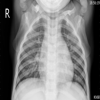

11/11 [==============================] - 0s 16ms/step
The predicted value is 1
PNEUMONIA


In [15]:
#Predict

import random

r = random.randint(0, len(xtest))
print(r)
mediapy.show_image(xtest[r])

prediction = cnn.predict(xtest)
output = np.argmax(prediction[r])
print(f"The predicted value is {output}")
print(folder_names[output])